In [175]:
import numpy as np
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile,f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [176]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)
#includes all features from columns also floats and normalizes them

X = data.values[:,1:-1].astype('float64') #assures data is same type/format
#X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0) #from scratch scaling
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

All LR feature weights:
[ 0.69310273  0.74889515  0.76485112  0.99703253 -0.21488682  0.55437203
  1.64248906  2.33456278  0.04669199 -1.30159327  1.28968424 -0.36301494
  1.00535739  0.88130844 -0.67541026 -0.72874247 -0.48697947 -0.3022146
 -0.51553419 -0.68374043  1.57371518  1.27606352  1.4843543   1.41841259
  0.62653777  0.90772302  1.25292759  2.36548035  0.88320209]


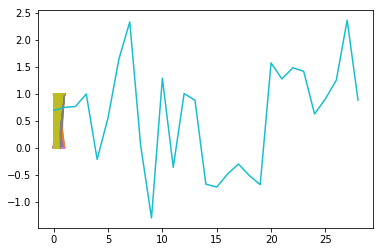

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0) #splitting data randomly

#naming all classifiers from their imports
svm = SVC()
rfc =RandomForestClassifier()
dt = tree.DecisionTreeClassifier()
nb = GaussianNB()
mlp = MLPClassifier(max_iter=250, learning_rate_init=0.1)

#Viewing LR coefficients
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print('All LR feature weights:')
coef=logreg.coef_[0]
print(coef)
plt.plot(X, Y)
plt.plot(coef)
plt.show()

In [221]:
############### All Features with Scikit-learn Algoritms #################################

print('Accuracy with all features:')
print('\n')

#training algorithm
svm.fit(X_train, Y_train)

#using test dataset for predictive accuracy
print('SVM scikit-learn accuracy: {:.2f}'.format(svm.score(X_test, Y_test)*100),  '%')

#cross-validation (not used results)
scores = cross_val_score(svm, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#performing the predictions function to build the confusion matrix
predictions = svm.predict(X_test)
print(confusion_matrix(Y_test, predictions))
cm = confusion_matrix(Y_test, predictions)

#Classification report for F1 scoring
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, predictions, target_names=target_names))

rfc.fit(X_train, Y_train)
print('RFC scikit-learn accuracy: {:.2f}'.format(rfc.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(rfc, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions2 = rfc.predict(X_test)
print(confusion_matrix(Y_test, predictions2))
print(classification_report(Y_test, predictions2, target_names=target_names))

dt.fit(X_train, Y_train)
print('DT scikit-learn accuracy: {:.2f}'.format(dt.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(dt, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions25 = dt.predict(X_test)
print(confusion_matrix(Y_test, predictions25))
print(classification_report(Y_test, predictions2, target_names=target_names))


nb.fit(X_train, Y_train)
print('NB scikit-learn accuracy: {:.2f}'.format(nb.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(nb, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions3 = nb.predict(X_test)
print(confusion_matrix(Y_test, predictions3))
print(classification_report(Y_test, predictions3, target_names=target_names))

mlp.fit(X_train, Y_train)
print('MLP scikit-learn accuracy: {:.2f}'.format(mlp.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(mlp, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions5 = mlp.predict(X_test)
print(confusion_matrix(Y_test, predictions5))
print(classification_report(Y_test, predictions5, target_names=target_names))


logreg.fit(X_train, Y_train)
print('LR scikit-learn accuracy: {:.2f}'.format(logreg.score(X_test, Y_test)*100),  '%')
scores = cross_val_score(logreg, X_train, Y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Confusion Matrix:")
predictions5 = logreg.predict(X_test)
print(confusion_matrix(Y_test, predictions5))
print(classification_report(Y_test, predictions5, target_names=target_names))
print('\n')

Accuracy with all features:


SVM scikit-learn accuracy: 95.80 %
Cross Validation Accuracy:
[ 0.90697674  0.96511628  0.92941176  0.96470588  0.94047619]
Accuracy: 0.94 (+/- 0.04)
[[90  0]
 [ 6 47]]
             precision    recall  f1-score   support

     Benign       0.94      1.00      0.97        90
  Malignant       1.00      0.89      0.94        53

avg / total       0.96      0.96      0.96       143

RFC scikit-learn accuracy: 98.60 %
Cross Validation Accuracy:
[ 0.94186047  0.95348837  0.94117647  0.98823529  0.96428571]
Accuracy: 0.96 (+/- 0.03)
Confusion Matrix:
[[89  1]
 [ 1 52]]
             precision    recall  f1-score   support

     Benign       0.99      0.99      0.99        90
  Malignant       0.98      0.98      0.98        53

avg / total       0.99      0.99      0.99       143

DT scikit-learn accuracy: 88.81 %
Cross Validation Accuracy:
[ 0.91860465  0.88372093  0.95294118  0.90588235  0.91666667]
Accuracy: 0.92 (+/- 0.04)
Confusion Matrix:
[[77 13]
 [ 3 50]

In [226]:
############### SelectFromPercentile Features #################################
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
#SelectPercentile function within select:
select = feature_selection.SelectPercentile(f_classif, percentile=10)
#Carrying out feature selection using select on the training data and transforming it to the test data
selected = select.fit(X_train, Y_train)
X_train_selected = selected.transform(X_train)
X_test_selected = selected.transform(X_test)

#Identifying features selected
print('Scikit-learn Feature Selection:')
print('X_train shape is: {}'.format(X_train.shape))
print('(30 features range from 0-29 due to Python language)')
print('X_train feature selected shape is: {}'.format(X_train_selected.shape))
print("\n", "These selected features are:")

#Getting the feature number of the features selected
#also printing all features identifying with "false" for not selected and "true" for selected
#Match the true features to their number to get their feature names
mask = select.get_support()
print(mask)
idxs_selected = select.get_support(indices=True)
print(idxs_selected)
print("All SelectPercentile p-values from lowest to highest")
#using p-value to order feature importance
p_value= np.sort(selected.pvalues_)
p_valuenames = np.argsort(selected.pvalues_)
print(p_value)
print("Feature column number's p-values from lowest to highest")
print(p_valuenames)

print("Top 10 Percentile Selected (highest to lowest) :")
print('27 - concave points_worst, 7 - concave points_mean, 22 - perimeter_worst')
print("\n")


############### SelectPercentile with Scikit-learn Algoritms #################################
print('Accuracy with Top 10 Percentile feature selection:')

selected = select.fit(X_train, Y_train)
X_train_selected = selected.transform(X_train)
X_test_selected = selected.transform(X_test)

svm.fit(X_train_selected, Y_train)
print('SVM scikit-learn accuracy: {:.2f}'.format(svm.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(svm, X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = svm.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

rfc.fit(X_train_selected, Y_train)
print('RFC scikit-learn accuracy: {:.2f}'.format(rfc.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(rfc, X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = rfc.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

nb.fit(X_train_selected, Y_train)
print('NB scikit-learn accuracy: {:.2f}'.format(nb.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(nb, X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = nb.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

dt.fit(X_train_selected, Y_train)
print('DT scikit-learn accuracy: {:.2f}'.format(dt.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(dt, X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = dt.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

mlp.fit(X_train_selected, Y_train)
print('MLP scikit-learn accuracy: {:.2f}'.format(mlp.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(mlp,X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = mlp.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

logreg.fit(X_train_selected, Y_train)
print('LR scikit-learn accuracy: {:.2f}'.format(logreg.score(X_test_selected, Y_test)*100),  '%')
scores = cross_val_score(logreg,X_train_selected, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = logreg.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

Scikit-learn Feature Selection:
X_train shape is: (426, 29)
(30 features range from 0-29 due to Python language)
X_train feature selected shape is: (426, 3)

 These selected features are:
[False False False False False False False  True False False False False
 False False False False False False False False False False  True False
 False False False  True False]
[ 7 22 27]
All SelectPercentile p-values from lowest to highest
[  2.90246801e-94   8.98762428e-87   3.08095116e-86   3.11012794e-84
   8.19690935e-73   1.18230031e-69   2.55823842e-69   1.48052645e-62
   1.45377554e-60   2.92390622e-54   9.49913611e-45   1.24060859e-43
   7.43308506e-36   4.06310902e-34   1.36320509e-31   5.36444219e-22
   8.87987480e-21   3.75876060e-20   8.37108067e-18   1.27734112e-15
   1.29817853e-15   3.44436651e-13   2.94961572e-08   1.07859166e-04
   6.41875480e-02   2.69973265e-01   4.97932018e-01   5.41630631e-01
   6.30247708e-01]
Feature column number's p-values from lowest to highest
[27  7 22 20

In [228]:
######################### SelectKBest, chi2 Features ###################################################
#Implementing SelectKBest with chi2 as "select"
select = feature_selection.SelectKBest(chi2, k=10)
selected2 = select.fit(X_train, Y_train)
#Carrying out feature selection using "select" on the training data and transforming it to the test data
X_train_selected2 = selected2.transform(X_train)
X_test_selected2 = selected2.transform(X_test)
print('X_train feature selected shape is: {}'.format(X_train_selected2.shape))
print('(30 features range from 0-29 due to Python language)')

#Getting the feature number of the features selected
#also printing all features identifying with "false" for not selected and "true" for selected
#Match the true features to their number to get their feature names
mask = selected2.get_support()
print('Selected 10 (k) feature column numbers with chi2')
print(mask)
idxs_selected = selected2.get_support(indices=True)
print(idxs_selected)
#Using p-value to rank feature importance from the selection method
print("All Chi2 ranking p-values using selectkbest")
pvalue= np.sort(selected.pvalues_)
pvaluenames = np.argsort(selected.pvalues_)
print(pvalue)
print("Selected 10 (k) p-values from lowest to highest:")
print(pvaluenames)
print("Selected 10 top ranked from highest to lowest:")
print('27 - concave points_worst',
       '7 - concave points_mean',
      '22 - perimeter_worst',
      '20 - radius_worst',
      '2 - perimeter_mean' ,
      '23 - area_worst',
      '0 - radius_mean ',
      '3 - area_mean', 
      '6 -  concavity_mean',
     '26 - concavity_worst')


############### SelectKBest with Scikit-learn Algoritms #################################

print("\n")

svm.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of SVM: {:.2f}'.format(svm.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(svm, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = svm.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

rfc.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of RFC: {:.2f}'.format(rfc.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(rfc, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = rfc.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

dt.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of DT: {:.2f}'.format(dt.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(dt, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = dt.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

nb.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of NB: {:.2f}'.format(nb.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(nb, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = nb.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

mlp.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of MLP: {:.2f}'.format(mlp.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(mlp, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = mlp.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

logreg.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of LR: {:.2f}'.format(logreg.score(X_test_selected2, Y_test)*100),  '%')
scores = cross_val_score(logreg, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = logreg.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions))

X_train feature selected shape is: (426, 10)
(30 features range from 0-29 due to Python language)
Selected 10 (k) feature column numbers with chi2
[ True False  True  True False False  True  True False False False False
 False False False False False False False False  True False  True  True
 False False  True  True False]
[ 0  2  3  6  7 20 22 23 26 27]
All Chi2 ranking p-values using selectkbest
[  2.90246801e-94   8.98762428e-87   3.08095116e-86   3.11012794e-84
   8.19690935e-73   1.18230031e-69   2.55823842e-69   1.48052645e-62
   1.45377554e-60   2.92390622e-54   9.49913611e-45   1.24060859e-43
   7.43308506e-36   4.06310902e-34   1.36320509e-31   5.36444219e-22
   8.87987480e-21   3.75876060e-20   8.37108067e-18   1.27734112e-15
   1.29817853e-15   3.44436651e-13   2.94961572e-08   1.07859166e-04
   6.41875480e-02   2.69973265e-01   4.97932018e-01   5.41630631e-01
   6.30247708e-01]
Selected 10 (k) p-values from lowest to highest:
[27  7 22 20  2 23  0  3  6 26  5 25 10 12 13 21

In [230]:
######################### SelectKBest, ANOVA F-value Features ###################################################

select3 = feature_selection.SelectKBest(f_classif,k=10)
selected3 = select.fit(X_train, Y_train)
X_train_selected3 = selected3.transform(X_train)
X_test_selected3 = selected3.transform(X_test)
print('X_train feature selected shape is: {}'.format(X_train_selected3.shape))
print('(30 features range from 0-29 due to Python language)')
mask = selected3.get_support()
print('Selected 10 (k) feature column numbers with ANOVA F-values:')
print(mask)
idxs_selected = selected3.get_support(indices=True)

print(idxs_selected)

print("Feature p-values with ANOVA selectkbest")
pval= np.sort(selected.pvalues_)
pvalnames = np.argsort(selected.pvalues_)
print(pval)
print("Feature p-values ranked from lowest to highest:")
print(pvalnames)
print("10 (k) selected features from most to least significant:")
print('27 - concave points_worst',
       '7 - concave points_mean',
      '22 - perimeter_worst',
      '20 - radius_worst',
      '2 - perimeter_mean' ,
      '23 - area_worst',
      '0 - radius_mean ',
      '3 - area_mean', 
      '6 -  concavity_mean',
     '26 - concavity_worst')

############### SelectKBest with Scikit-learn Algoritms #################################

print("\n")

svm.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of SVM: {:.2f}'.format(svm.score(X_test_selected3, Y_test)*100),  '%')
scores = cross_val_score(svm, X_train_selected2, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predictions = svm.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions, target_names=target_names))

rfc.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of RFC: {:.2f}'.format(rfc.score(X_test_selected3, Y_test)*100),  '%')
scores = cross_val_score(rfc, X_train_selected3, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = rfc.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions))

dt.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of DT: {:.2f}'.format(dt.score(X_test_selected3, Y_test)*100),  '%')
scores = cross_val_score(dt, X_train_selected3, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = dt.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions))

nb.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of NB: {:.2f}'.format(nb.score(X_test_selected3, Y_test)*100),  '%')
scores = cross_val_score(nb, X_train_selected3, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = nb.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions))

mlp.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of MLP: {:.2f}'.format(mlp.score(X_test_selected3, Y_test)*100),  '%')
scores = cross_val_score(mlp, X_train_selected3, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = mlp.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions))

logreg.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of LR: {:.2f}'.format(logreg.score(X_test_selected3, Y_test)*100),  '%')
scores = cross_val_score(logreg, X_train_selected3, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, predictions, target_names=target_names))
predictions = logreg.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions))


X_train feature selected shape is: (426, 10)
(30 features range from 0-29 due to Python language)
Selected 10 (k) feature column numbers with ANOVA F-values:
[ True False  True  True False False  True  True False False False False
 False False False False False False False False  True False  True  True
 False False  True  True False]
[ 0  2  3  6  7 20 22 23 26 27]
Feature p-values with ANOVA selectkbest
[  2.90246801e-94   8.98762428e-87   3.08095116e-86   3.11012794e-84
   8.19690935e-73   1.18230031e-69   2.55823842e-69   1.48052645e-62
   1.45377554e-60   2.92390622e-54   9.49913611e-45   1.24060859e-43
   7.43308506e-36   4.06310902e-34   1.36320509e-31   5.36444219e-22
   8.87987480e-21   3.75876060e-20   8.37108067e-18   1.27734112e-15
   1.29817853e-15   3.44436651e-13   2.94961572e-08   1.07859166e-04
   6.41875480e-02   2.69973265e-01   4.97932018e-01   5.41630631e-01
   6.30247708e-01]
Feature p-values ranked from lowest to highest:
[27  7 22 20  2 23  0  3  6 26  5 25 10 12

In [33]:
PostLR_L1norm_selection =data[['texture_mean', 'compactness_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se',
                  'perimeter_se', 'compactness_se', 'concavity_se','concave points_se','symmetry_se', 'fractal_dimension_se',
                  'perimeter_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']]


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(PostLR_L1norm_selection, Y, test_size=0.25, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
score = logreg.score(X_test, Y_test)
print("Scikit-learn LR Accuracy with Post-algorithm Feature Selection:", score*100)
scores = cross_val_score(logreg, X_train, Y_train, cv=5)
print('Cross Validation Accuracy:')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Scikit-learn LR Accuracy with Post-algorithm Feature Selection: 93.00699300699301
Cross Validation Accuracy:
[0.91860465 0.89534884 0.89411765 0.90588235 0.92857143]
Accuracy: 0.91 (+/- 0.03)
